In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [11]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prime_df = pd.read_csv('pima-indians-diabetes-1.data',names=colnames)
prime_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
prime_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
6,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
148,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
72,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
35,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
0,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
33.6,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
0.627,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
50,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
1,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


In [12]:
prime_df.head(10)  #let us look at the raw data. As is evident, there are lot of missing values 

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
prime_df.shape

(768, 9)

In [14]:
prime_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     768 non-null    int64  
 1   glu      768 non-null    int64  
 2   bp       768 non-null    int64  
 3   sft      768 non-null    int64  
 4   ins      768 non-null    int64  
 5   bmi      768 non-null    float64
 6   dpf      768 non-null    float64
 7   age      768 non-null    int64  
 8   outcome  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


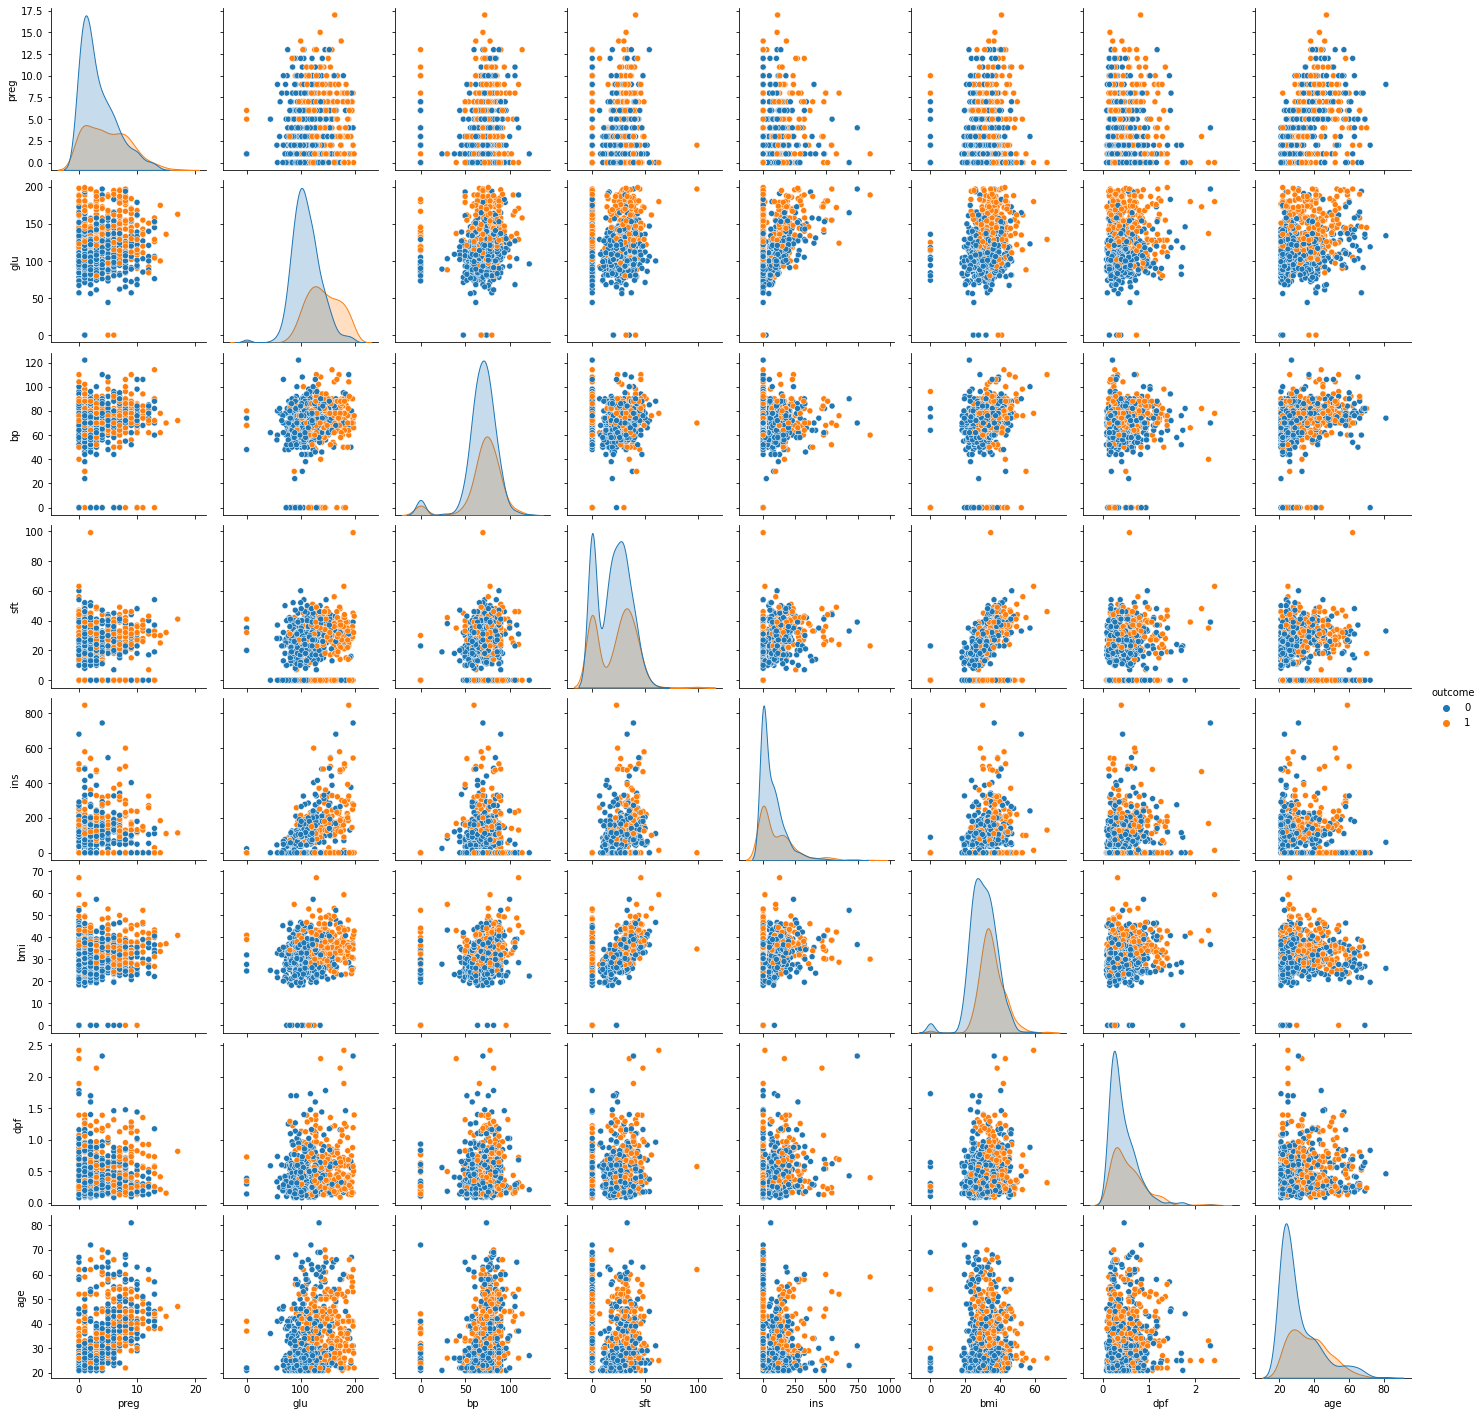

In [17]:
import seaborn as sns
sns.pairplot(prime_df , diag_kind = "kde", hue="outcome")

In [18]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  prime_df.drop("outcome", axis=1)
y =  prime_df.pop("outcome")

In [19]:
X.head()

,preg,glu,bp,sft,ins,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
X.dtypes

preg      int64
glu       int64
bp        int64
sft       int64
ins       int64
bmi     float64
dpf     float64
age       int64
dtype: object

In [22]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [23]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB()

In [24]:
model.score(train_set , train_labels)      # performance on test data

0.7616387337057728

In [25]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

[[128  18]
 [ 32  53]]


In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict



scores = cross_val_score(model, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores )
print("Average score:" , np.average(scores))

Cross-validated scores: [0.64814815 0.64814815 0.7962963  0.7037037  0.74074074 0.81481481
 0.74074074 0.79245283 0.79245283 0.75471698]
Average score: 0.7432215234102026
